# "Price Charts with Technical Indicators"

"Calculating Stock Price Indicators using FINTA python library, and visualizing using plotly python library."

- toc: false
- branch: master
- badges: true
- comments: true
- categories: [stocks, python, finta, pandas, plotly, ipywidgets]



There are a couple of libraries to use to calculate technical indicators for stocks. In previous posts, we had tried out the following python libraries:  

> mplfinance

> TA-lib

In this post we will be looking at the [finta library](https://https://pypi.org/project/finta/). 

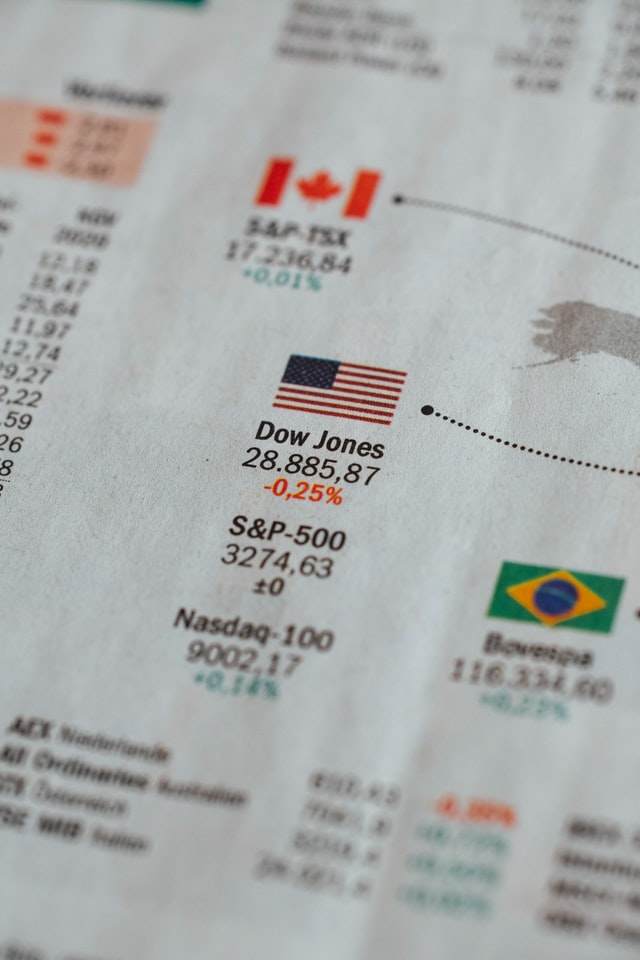

Image credits to Markus Spiske - Unsplash photos




## Install required dependencies on Google Colab 



In [1]:
!pip install finta

## Load required libraries



In [2]:
from pandas_datareader import data
import numpy as np
from datetime import datetime 
from datetime import date, timedelta
import pandas as pd

# import ipwidgets library and functions
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

from finta import TA

## Create widgets and dataframe for the stock data


*Instructions for use. *
1.   Insert tuple of stock list.  
2.   Select stock from dropdown. 
3.   Select number of calendar days for dates from the last trading day. 
4.   Rerun all code after.

In [3]:
# Insert a tuple of unique tickers into the options variables.
#tickers = ('MMM', 'AOS', 'AAN', 'ABB', 'ABT', 'ABBV', 'ABM', 'ACN', 'AYI', 'GOLF', 'ADCT', 'ADT', 'AAP', 'ADSW', 'WMS', 'ACM', 'AEG', 'AER', 'AJRD', 'AMG', 'AFL', 'AGCO', 'A', 'AEM', 'ADC', 'AL', 'APD', 'AGI', 'ALK', 'ALB', 'ACI', 'AA', 'ALC', 'ARE', 'AQN', 'BABA', 'Y')
#tickers = ('ARKF', 'ARKG', 'ARKK', 'ARKW', 'QQQ','TQQQ', 'VCR', "KARS", 'ZNGA')
tickers = ('SOXX', 'SOXL', 'TQQQ', 'QQQ', 'ARKK', 'ARKW', 'FDN', 'XLY', 'VCR', 'FPX', 'SMH')

In [4]:
# create dropdown for selected stocks
stock_ticker = widgets.Dropdown(
    options= tickers,
    description='Select Stock Ticker',
    disabled=False,
    style = {'description_width': 'initial'}, 
    layout = {'width': '200px'}
)

# create selection slider for days
w = widgets.IntSlider(
    value=90,
    min=5,
    max=365,
    step=1,
    description = 'Calendar days',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style = {'description_width': 'initial','handle_color' : 'blue'}, 
    layout = {'width': '400px'}
)

# create function for time frame of selected calendar days from today
def timeframe(w):
    days = timedelta(w)
    start = date.today() - days
    today = date.today()
    print('Start Date: ',start, '                 ' ,'Last Date: ',today)
       
dates = widgets.interactive_output(timeframe, {'w': w} )

display(stock_ticker, w, dates)

Dropdown(description='Select Stock Ticker', layout=Layout(width='200px'), options=('SOXX', 'SOXL', 'TQQQ', 'QQ…

IntSlider(value=90, continuous_update=False, description='Calendar days', layout=Layout(width='400px'), max=36…

Output()

## Download data for the stock

In [5]:
# create text to show stock ticker 

v = widgets.Text(
    value=stock_ticker.value,
    description='Stockticker:',
    disabled=True
)

# create function to load stock data from yahoo 
def load_stock_data(stock_ticker, w):
    start = date.today() - timedelta(w)
    today = date.today()
    stock_data = data.DataReader(stock_ticker, start=start, end=today, data_source='yahoo')
    return stock_data

# create dataframe for selected stock
stock = load_stock_data(stock_ticker.value, w.value)

# display ticker and dataframe

display(v, stock)

Text(value='SOXX', description='Stockticker:', disabled=True)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-27,285.809998,280.359985,280.559998,285.690002,774800.0,284.660675
2020-07-28,283.970001,279.609985,283.600006,280.170013,607500.0,279.160553
2020-07-29,287.109985,282.359985,282.660004,285.940002,484000.0,284.909760
2020-07-30,291.839996,285.040009,285.109985,291.570007,905800.0,290.519501
2020-07-31,292.440002,285.959991,292.299988,290.390015,642800.0,289.343750
...,...,...,...,...,...,...
2020-10-19,330.290009,322.799988,328.350006,324.040009,402900.0,324.040009
2020-10-20,326.380005,322.750000,325.500000,323.510010,349600.0,323.510010
2020-10-21,324.929993,321.079987,324.279999,321.339996,358100.0,321.339996


In [6]:
# format dataframe in the format required by finta 
ohlcv = stock[['Open', 'High', 'Low', 'Close', 'Volume']]   # select the columns in the order required

ohlcv.columns = ['open', 'high', 'low', 'close', 'volume']  # rename the columns

ohlcv

,open,high,low,close,volume
Date,,,,,
2020-07-27,280.559998,285.809998,280.359985,285.690002,774800.0
2020-07-28,283.600006,283.970001,279.609985,280.170013,607500.0
2020-07-29,282.660004,287.109985,282.359985,285.940002,484000.0
2020-07-30,285.109985,291.839996,285.040009,291.570007,905800.0
2020-07-31,292.299988,292.440002,285.959991,290.390015,642800.0
...,...,...,...,...,...
2020-10-19,328.350006,330.290009,322.799988,324.040009,402900.0
2020-10-20,325.500000,326.380005,322.750000,323.510010,349600.0
2020-10-21,324.279999,324.929993,321.079987,321.339996,358100.0


## Calculate some Stock Price Indicators

In [7]:
# create example dataframe to try out the functions

ex_df = ohlcv.copy()

ex_df['RSI'] = TA.RSI(ex_df)
ex_df['Simple_Moving_Average_50'] = TA.SMA(ex_df, 50)
ex_df[['macd', 'macd_s']] = TA.MACD(ex_df)

ex_df

,open,high,low,close,volume,RSI,Simple_Moving_Average_50,macd,macd_s
Date,,,,,,,,,
2020-07-27,280.559998,285.809998,280.359985,285.690002,774800.0,NaN,NaN,0.000000,0.000000
2020-07-28,283.600006,283.970001,279.609985,280.170013,607500.0,0.000000,NaN,-0.123846,-0.068803
2020-07-29,282.660004,287.109985,282.359985,285.940002,484000.0,52.956604,NaN,0.021123,-0.031948
2020-07-30,285.109985,291.839996,285.040009,291.570007,905800.0,69.775506,NaN,0.289809,0.077048
2020-07-31,292.299988,292.440002,285.959991,290.390015,642800.0,64.565317,NaN,0.382753,0.167988
...,...,...,...,...,...,...,...,...,...
2020-10-19,328.350006,330.290009,322.799988,324.040009,402900.0,61.934468,305.0528,7.295558,5.988757
2020-10-20,325.500000,326.380005,322.750000,323.510010,349600.0,61.243647,305.5992,6.966201,6.184246
2020-10-21,324.279999,324.929993,321.079987,321.339996,358100.0,58.372764,306.1640,6.456954,6.238787


## Create a function to create a dataframe that captures some stock technical indicators

In [8]:
# create function to create the Stock Indicator dataframe 

def create_dataframe(df):

    """
    This function creates a Dataframe for key indicators
    """
        
    df['Daily_Returns'] = df['close'].pct_change()  # create column for daily returns
    df['Price_Up_or_Down'] = np.where(df['Daily_Returns'] < 0, -1, 1) # create column for price up or down 

    
    # add columns for the volatility and volume indicators
    
    df['Average_True_Range'] = TA.ATR(df)
    df['On_Balance_Volume'] = TA.OBV(df)
    df['Volume_Flow_Indicator'] = TA.VFI(df)

    ## add column for moving averages
    
    df['Simple_Moving_Average_50'] = TA.SMA(df, 50)
    #df['Simple_Moving_Average_200'] = TA.SMA(df, 200)
    df['Volume Weighted Average Price'] = TA.VWAP(df)
    df['Exponential_Moving_Average_50'] = TA.EMA(df, 50)

    ## add column for trade yes or no (based on above 50 or 200 moving average)

    # add columns for momentum indicators
    
    df['ADX'] = TA.ADX(df) #create column for ADX assume timeperiod of 14 days
    df['RSI'] = TA.RSI(df) #create column for RSI assume timeperiod of 14 days 
    df['William %R'] = TA.WILLIAMS(df) #create column for William %R use high, low and close, and assume timeperiod of 14 days
    df['MFI'] = TA.MFI(df) #create column for MFI use high, low and close, and assume timeperiod of 14 days
    df['MOM'] = TA.MOM(df)
    df[['macd', 'macd_signal']] = TA.MACD(df)

    return df # return the dataframe

In [9]:
# Create a dataframe with all the stock indicators you indicated in the create dataframe function

stocks_df = create_dataframe(df = ohlcv)

stocks_df

,open,high,low,close,volume,Daily_Returns,Price_Up_or_Down,Average_True_Range,On_Balance_Volume,Volume_Flow_Indicator,Simple_Moving_Average_50,Volume Weighted Average Price,Exponential_Moving_Average_50,ADX,RSI,William %R,MFI,MOM,macd,macd_signal
Date,,,,,,,,,,,,,,,,,,,,
2020-07-27,280.559998,285.809998,280.359985,285.690002,774800.0,NaN,1,NaN,NaN,NaN,NaN,283.953328,285.690002,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2020-07-28,283.600006,283.970001,279.609985,280.170013,607500.0,-0.019322,-1,NaN,-607500.0,NaN,NaN,282.765256,282.874808,NaN,0.000000,NaN,NaN,NaN,-0.123846,-0.068803
2020-07-29,282.660004,287.109985,282.359985,285.940002,484000.0,0.020595,1,NaN,-123500.0,NaN,NaN,283.380248,283.937676,NaN,52.956604,NaN,NaN,NaN,0.021123,-0.031948
2020-07-30,285.109985,291.839996,285.040009,291.570007,905800.0,0.019689,1,NaN,782300.0,NaN,NaN,285.374468,285.961739,NaN,69.775506,NaN,NaN,NaN,0.289809,0.077048
2020-07-31,292.299988,292.440002,285.959991,290.390015,642800.0,-0.004047,-1,NaN,139500.0,NaN,NaN,286.169230,286.919634,NaN,64.565317,NaN,NaN,NaN,0.382753,0.167988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-19,328.350006,330.290009,322.799988,324.040009,402900.0,-0.005036,-1,6.673575,-2998700.0,NaN,305.0528,302.215983,308.643875,21.807370,61.934468,-26.619171,73.111215,12.809998,7.295558,5.988757
2020-10-20,325.500000,326.380005,322.750000,323.510010,349600.0,-0.001636,-1,6.591433,-3348300.0,NaN,305.5992,302.441020,309.282507,21.538161,61.243647,-28.335488,67.203975,13.760010,6.966201,6.184246
2020-10-21,324.279999,324.929993,321.079987,321.339996,358100.0,-0.006708,-1,6.358575,-3706400.0,NaN,306.1640,302.648519,309.798550,20.885840,58.372764,-35.362732,60.498775,5.660004,6.456954,6.238787


# Visualizations 

## Price Action Chart

In [10]:
# create  OHLC charts with Plotly 

import plotly.graph_objects as go


fig_ohlc = go.Figure(data=[go.Ohlc(x=stocks_df.index,
                open=stocks_df['open'],
                high=stocks_df['high'],
                low=stocks_df['low'],
                close=stocks_df['close'], showlegend=False)])
      
fig_ohlc.update_layout(title = 'Price Action Chart', yaxis_title = 'Stock Price', template = 'presentation')

fig_ohlc.update(layout_xaxis_rangeslider_visible=False)

display(v)

fig_ohlc.show()

Text(value='SOXX', description='Stockticker:', disabled=True)

In [11]:
# create  Candlestick charts with Plotly 

import plotly.graph_objects as go


fig_candle = go.Figure(data=[go.Candlestick(x=stocks_df.index,
                open=stocks_df['open'],
                high=stocks_df['high'],
                low=stocks_df['low'],
                close=stocks_df['close'], showlegend=False)])
      
fig_candle.update_layout(title = 'Price Action Chart', yaxis_title = 'Stock Price', template = 'presentation')

fig_candle.update(layout_xaxis_rangeslider_visible=False)

display(v)

fig_candle.show()

Text(value='SOXX', description='Stockticker:', disabled=True)

## Momentum Indicators

In [12]:
#hide
import plotly.graph_objects as go
import plotly.offline as pyo

trace1 = go.Scatter(x=stocks_df.index, y=stocks_df['macd'], mode='lines', marker=dict(color="green"), showlegend=True, name='macd')

trace2 = go.Scatter(x=stocks_df.index, y=stocks_df['macd_signal'], mode='lines', marker=dict(color="blue"), showlegend=True, name='macd_signal')

data= [trace1, trace2]

layout = go.Layout(title = 'MACD indicator')

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename='MACD_indicator.html')

'MACD_indicator.html'

In [13]:
import plotly.graph_objects as go

trace1 = go.Scatter(x=stocks_df.index, y=stocks_df['macd'], mode='lines', marker=dict(color="green"), showlegend=True, name='macd')

trace2 = go.Scatter(x=stocks_df.index, y=stocks_df['macd_signal'], mode='lines', marker=dict(color="blue"), showlegend=True, name='macd_signal')

data= [trace1, trace2]

layout = go.Layout(title = 'MACD indicator')

fig = go.Figure(data=data, layout=layout)
fig.show()

# References 

https://plotly.com/python/mixed-subplots/

[Plotly Figure Reference](https://plotly.com/python/reference/index/)

[FinTA (Financial Technical Analysis) python library](https://github.com/peerchemist/finta)

